In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 解决坐标轴刻度负号乱码 
plt.rcParams['axes.unicode_minus'] = False
# 解决中文乱码问题 
plt.rcParams['font.sans-serif'] = ['Simhei']

In [77]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#导入数据集
iris = pd.read_csv("iris.txt",header = None) 
iris.head()
iris.shape

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(150, 5)

In [69]:
def distEclud(arrA,arrB):
    d = arrA - arrB
    dist = np.sum(np.power(d,2),axis=1)
    return dist

In [78]:
# 自动生成随机质心的函数
def randCent(dataSet,k):
    n = dataSet.shape[1] # 列数
    data_max = dataSet.iloc[:,:n-1].max()
    data_min = dataSet.iloc[:,:n-1].min()
    data_cent = np.random.uniform(data_min,data_max,(k,n-1))
    return data_cent

In [94]:
n = iris.shape[1]
n

5

In [95]:
data_max = iris.iloc[:,:n-1].max()
data_max

0    7.9
1    4.4
2    6.9
3    2.5
dtype: float64

In [96]:
data_min = iris.iloc[:,:n-1].min()

In [97]:
data_cent = np.random.uniform(data_min,data_max,(3,n-1))
data_cent

array([[4.40313642, 3.71770384, 6.4292717 , 0.30336958],
       [5.43252211, 2.14607676, 5.8020359 , 1.10653671],
       [5.63763482, 3.37137335, 3.01645213, 0.20810397]])

In [79]:
iris_count = randCent(iris,3)
iris_count

array([[5.39506844, 2.45018599, 5.76276738, 0.86639657],
       [6.31513789, 4.30790283, 2.39019343, 2.43185785],
       [6.38788429, 2.77065028, 4.95997957, 0.15382217]])

In [80]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent): 
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))  
    clusterAssment[:, 0] = np.inf     
    clusterAssment[:, 1: 3] = -1      
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)],
                           axis=1,ignore_index = True) 
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False        
        for i in range(m): 
            dist = distMeas(dataSet.iloc[i,:n-1].values, centroids)
            result_set.iloc[i, n] = dist.min() 
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0] 
            clusterChanged = not (result_set.iloc[:, -1] == 
                                  result_set.iloc[:,-2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [82]:
iris_cent,iris_result = kMeans(iris, 3)
iris_cent
iris_result.head()

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

,0,1,2,3,4,5,6,7
0,5.1,3.5,1.4,0.2,Iris-setosa,0.062588,1.0,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,0.175230,1.0,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,0.195796,1.0,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,0.244098,1.0,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,0.091645,1.0,1.0


In [85]:
testSet = pd.read_table('testSet.txt', header=None)
testSet.head()
testSet.shape

,0,1
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,-1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


(80, 2)

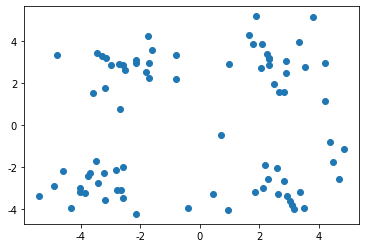

In [89]:
plt.scatter(testSet.iloc[:,0], testSet.iloc[:,1]);

In [90]:
label = pd.DataFrame(np.zeros(testSet.shape[0]).reshape(-1, 1))
test_set = pd.concat([testSet, label], axis=1, ignore_index = True)
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


In [91]:
test_cent, test_cluster = kMeans(test_set, 4)
test_cent
test_cluster.head()

array([[ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555],
       [-3.38237045, -2.9473363 ],
       [ 2.80293085, -2.7315146 ]])

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,2.320192,0.0,0.0
1,-3.453687,3.424321,0.0,1.390049,1.0,1.0
2,4.838138,-1.151539,0.0,6.638391,3.0,3.0
3,-5.379713,-3.362104,0.0,4.161410,2.0,2.0
4,0.972564,2.924086,0.0,2.769678,0.0,0.0


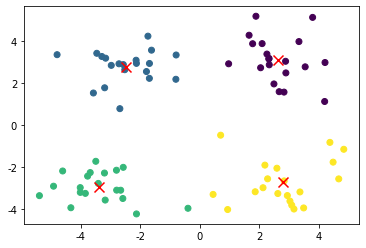

In [92]:
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:,1],c=test_cluster.iloc[:, -1])
plt.scatter(test_cent[:, 0], test_cent[:, 1], color='red',marker='x',s=100);